In [1]:
require './moromoro'

true

In [2]:
jikken_b_1 = <<DATA.to_df
x, vh
0   , 48.181
0.01, 48.064
0.02, 47.871
0.03, 47.605
0.04, 47.401
0.05, 47.242
0.06, 47.102
0.07, 46.702
0.08, 46.612
0.09, 46.172
0.100, 45.651
0.105, 45.153
0.110, 44.489
0.115, 43.653
0.120, 42.527
0.125, 41.123
0.130, 39.102
0.135, 36.342
0.140, 32.784
0.145, 28.525
0.150, 23.331
0.155, 18.245
0.160, 14.124
0.165, 10.892
0.170, 8.687
0.175, 6.891
0.180, 5.655
0.185, 4.682
0.190, 3.973
0.195, 3.374
0.200, 2.947
0.21, 2.091
0.22, 1.642
0.23, 1.341
0.24, 1.142
0.25, 0.973
0.26, 0.851
0.27, 0.751
0.28, 0.682
0.29, 0.637
0.30, 0.594
0.31, 0.546
0.32, 0.517
0.33, 0.493
0.34, 0.474
0.35, 0.465
0.36, 0.447
0.37, 0.422
0.38, 0.413
0.39, 0.413
0.40, 0.404
DATA
jikken_b_1.save_csv('csv/jikken_b_1.csv')

"csv/jikken_b_1.csv"

In [3]:
jikken_b_2 = <<DATA.to_df
y, vh
0,    -0.113
0.01, -0.137
0.02, -0.167
0.04, -0.223
0.06, -0.307
0.08, -0.427
0.10, -0.604
0.11, -0.730
0.12, -0.923
0.13, -1.159
0.14, -1.453
0.15, -1.901
0.16, -2.465
0.17, -3.072
0.18, -3.454
0.19, -3.092
0.195, -2.542
0.200, -1.950
0.205, -1.003
0.210, -0.125
0.215, 0.821
0.220, 1.694
0.225, 2.443
0.230, 3.030
0.235, 3.389
0.24, 3.464
0.25, 3.192
0.26, 2.619
0.27, 2.063
0.28, 1.637
0.29, 1.301
0.30, 1.062
0.31, 0.885
0.32, 0.754
0.34, 0.572
0.36, 0.446
0.38, 0.373
0.40, 0.310
DATA
jikken_b_2.save_csv('csv/jikken_b_2.csv')

"csv/jikken_b_2.csv"

In [4]:
"""
def convert_vh_to_h(vh)
  i_mag = 1.00
  vh_at_imag_1 = 48.103 * 10 ** (-3)
  k = i_mag / vh_at_imag_1
  
  k * vh
end
"""

def convert_vh_to_h(vh)
  imag_to_vhmv = 48.103
  vhmv_to_imag = 1.0 / imag_to_vhmv
  imag = vh * vhmv_to_imag
  imag * 20000.0
end

:convert_vh_to_h

# 実験データ

## 実験(b)

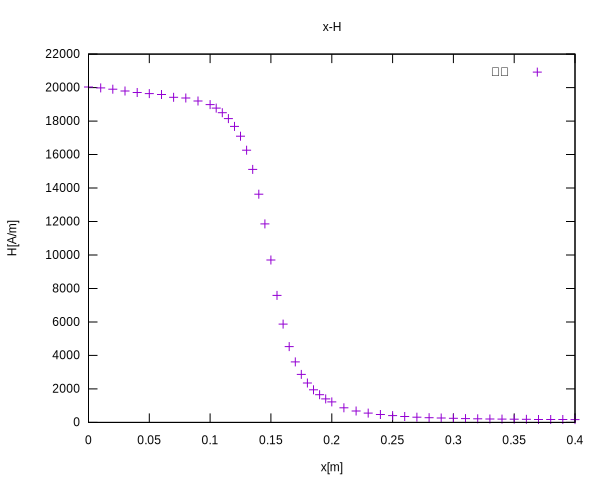

In [5]:
jikken_b_1.map{ |row| row.merge('h' => (convert_vh_to_h(row['vh']))) }.to_a.to_df.plot(
  targets: [{ x: 'x', y: 'h', title: '磁場' }],
  options: {
    title: 'x-H',
    xl: 'x[m]',
    yl: 'H[A/m]'
  },
  file: 'graph/jikken_b.png'
)

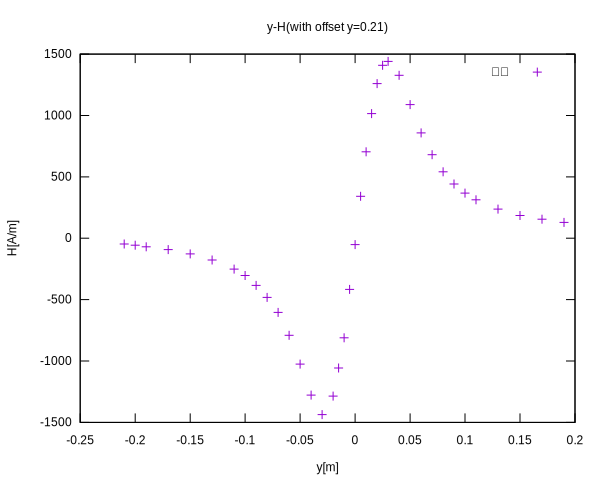

In [6]:
b_2_with_offset = jikken_b_2.map { |row| row.merge('y' => row['y'] - 0.21) }
b_2_with_offset.map{ |row| row.merge('h' => convert_vh_to_h(row['vh'])) }.to_a.to_df.plot(
  targets: [{ x: 'y', y: 'h', title: '磁場' }],
  options: {
    title: 'y-H(with offset y=0.21)',
    xl: 'y[m]',
    yl: 'H[A/m]'
  }
)

# 検討

## 磁場の変化を見る

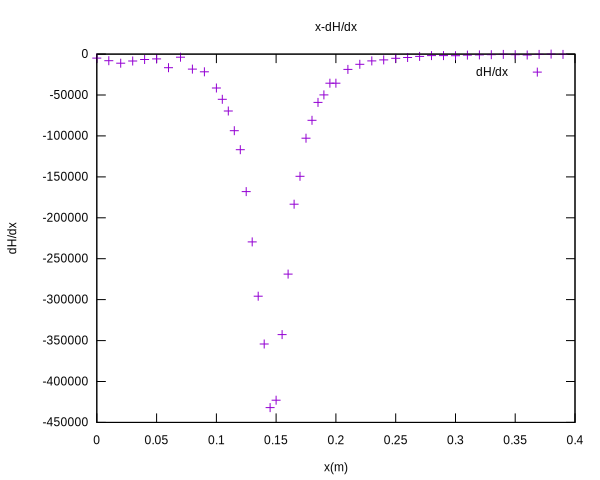

In [7]:
b_1 = jikken_b_1
b_1_with_differential = b_1.to_a.zip(b_1.to_a.drop(1))[0...-1].map do |current_row, next_row|
  differential = (convert_vh_to_h(next_row['vh']) - convert_vh_to_h(current_row['vh']))/(next_row['x'] - current_row['x'])
  current_row.merge('differential' => differential)
end.to_df

b_1_with_differential.plot(
  targets: [{x: 'x', y: 'differential', title: 'dH/dx'}],
  options: {
    title: 'x-dH/dx',
    xl: 'x(m)',
    yl: 'dH/dx'
  }
)

$$
0.07 \lt x \lt 0.15 (m)
$$
において$H$は変化している

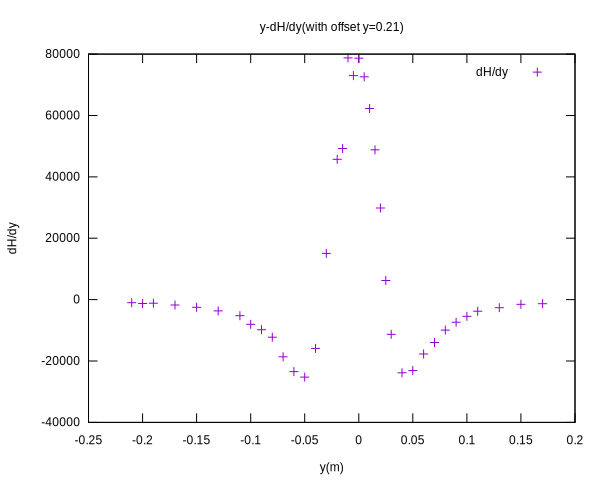

In [8]:
b_2_with_differential = b_2_with_offset.to_a.zip(b_2_with_offset.to_a.drop(1))[0...-1].map do |current_row, next_row|
  differential = (convert_vh_to_h(next_row['vh']) - convert_vh_to_h(current_row['vh']))/(next_row['y'] - current_row['y'])
  current_row.merge('differential' => differential)
end.to_df

b_2_with_differential.plot(
  targets: [{x: 'y', y: 'differential', title: 'dH/dy'}],
  options: {
    title: 'y-dH/dy(with offset y=0.21)',
    xl: 'y(m)',
    yl: 'dH/dy'
  }
)

$$
-0.15 \lt y \lt 0.15 (m)
$$
において$H$は変化している

In [9]:
dh_dx_at_x_0 = p b_1_with_differential.find { |row| row['x'] == 0.145 }['differential']
dh_dy_at_y_0 = p b_2_with_differential.find { |row| row['y'] == 0.0 }['differential']
puts "div H = #{"%.2e" % (dh_dx_at_x_0 + dh_dy_at_y_0 * 2)}"

-431906.53389601427
78664.53235764915
div H = -2.75e+05


In [10]:
b_1_with_differential

x,vh,differential
0.0,48.181,-4864.5614618628315
0.01,48.064,-8024.447539654648
0.02,47.871,-11059.601272270085
0.03,47.605,-8481.799471966222
0.04,47.401,-6610.814294327064
0.05,47.242,-5820.842774878841
0.06,47.102,-16630.97935679651
0.07,46.702,-3741.970355279411
0.08,46.612,-18294.077292476515
0.09,46.172,-21661.850612227845


In [11]:
b_2_with_differential

y,vh,differential
-0.21,-0.113,-997.8587614078114
-0.19999999999999998,-0.137,-1247.3234517597684
-0.19,-0.167,-1164.1685549757792
-0.16999999999999998,-0.223,-1746.252832463673
-0.15,-0.307,-2494.6469035195328
-0.13,-0.427,-3679.604182691305
-0.10999999999999999,-0.604,-5238.758497391018
-0.09999999999999999,-0.73,-8024.4475396544985
-0.09,-0.923,-9812.277820510146
-0.07999999999999999,-1.159,-12223.769827245691


In [12]:
#require 'math'
a = 0.3/(Math::PI*6000*2)

7.957747154594767e-06

In [13]:
def h_by_x(x)
  n = 20000.0
  i = 1.0
  l = 0.15
  a = 0.025 #適当
  n*i/2.0*((x+l)/Math.sqrt(a**2+(x+l)**2) - (x-l)/(Math.sqrt(a**2+(x-l)**2)))
end

:h_by_x

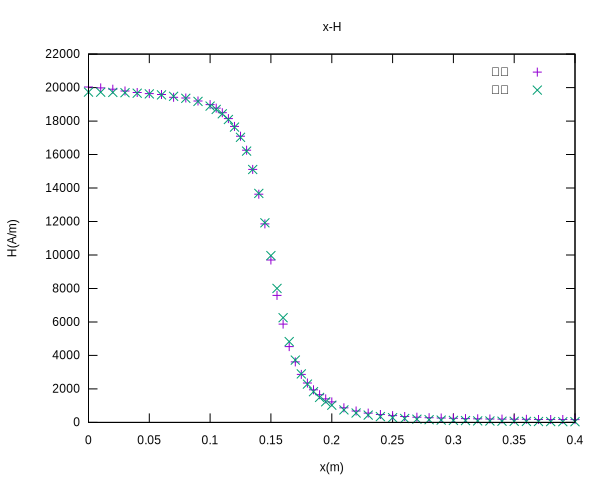

In [14]:
hoge = jikken_b_1.map do |row|
  row.merge(
    'h_by_calc' => h_by_x(row['x']),
    'h_by_jikken' => convert_vh_to_h(row['vh']),
  )
end.to_df
hoge.plot(
  targets: [{x: 'x', y: 'h_by_jikken', title: '実験'}, {x: 'x', y: 'h_by_calc', title: '計算'}],
  options: {
    title: 'x-H',
    xl: 'x(m)',
    yl: 'H(A/m)'
  }
)

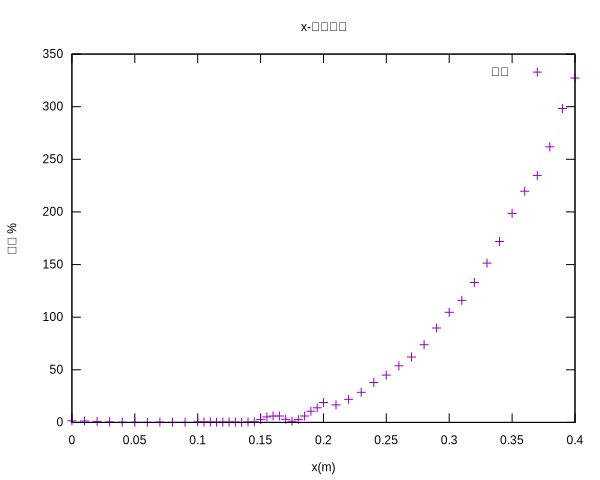

In [15]:
gosa_df = hoge.map do |row|
  zettai_gosa = (row['h_by_calc'] - row['h_by_jikken']).abs
  soutai_gosa = zettai_gosa / row['h_by_calc'] * 100.0
  row.merge('soutai_gosa' => soutai_gosa, 'zettai_gosa' => zettai_gosa)
end.to_a.to_df
gosa_df.plot(
  targets: [{x: 'x', y: 'soutai_gosa'}],
  options: {
    title: 'x-相対誤差',
    xl: 'x(m)',
    yl: '誤差 %'
  }
)

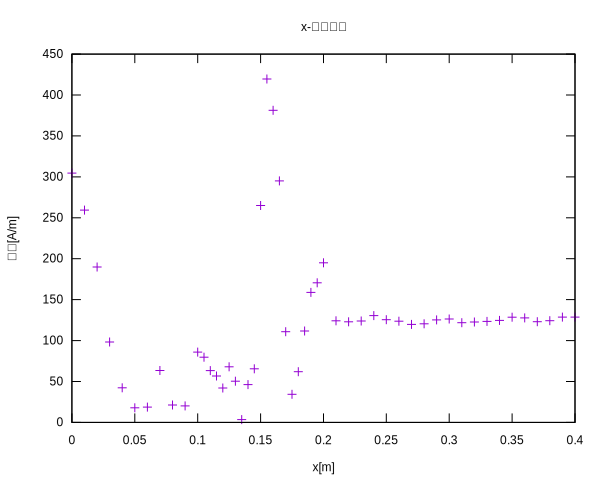

In [16]:
gosa_df.plot(
  targets: [{x: 'x', y: 'zettai_gosa', title: ''}],
  options: {
    title: 'x-絶対誤差',
    xl: 'x[m]',
    yl: '誤差[A/m]'
  }
)

In [17]:
jiba = (gosa_df.select { |row| row['x'] > 0.25 }.map { |row| row['zettai_gosa'] }.to_a).inject(:+)/15

124.59262367548776

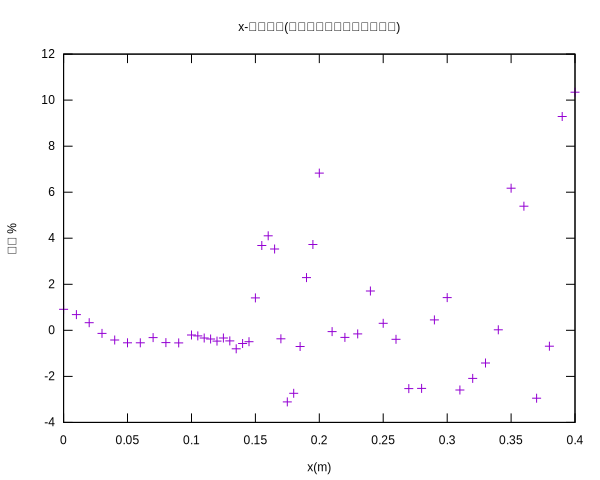

In [18]:
hoge.map do |row|
  zettai_gosa = (row['h_by_calc'] - row['h_by_jikken']).abs - jiba
  soutai_gosa = zettai_gosa / row['h_by_calc'] * 100.0
  row.merge('soutai_gosa' => soutai_gosa, 'zettai_gosa' => zettai_gosa)
end.to_a.to_df.plot(
  targets: [{x: 'x', y: 'soutai_gosa', title: ''}],
  options: {
    title: 'x-相対誤差(地磁気の影響を引いた場合)',
    xl: 'x(m)',
    yl: '誤差 %'
  }
)